In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('database.csv', sep=';', index_col=0, header=0)

In [3]:
df.head()

,P-lotki (Primaries),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
Species,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,...,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN
Anser anser,5,3,biały,biały,biały,5,2,czarnobrązowy z szarym nalotem,czarnobrązowy z szarą nasadą,brązowoszary,...,biały,biały,biały,4,2,szarobrązowy z białym wierzchołkiem,biały z szarą nasadą,jasnoszary,170,140
Tadorna tadorna (adult),5,3,biały,czarny,białoczarny,5,2,czarny,czarny,szaroczarny,...,biały,biały,biały,4,2,biały z czarnym wąskim wierzchołkiem,biały z czarnym wąskim wierzchołkiem,biały,140,120
Tadorna tadorna (young),5,3,biały,czarnobrązowy,białoczarnobrązowy,5,2,czarnoszare z białawą nasadą / + z białym wier...,czarnoszare z białawą nasadą / + z białym wier...,szaroczarne z białawą nasadą / + z białym wier...,...,biały,biały,biały,4,2,biały z ciemnobrązowym wierzchołkiem,biały z ciemnobrązowym wierzchołkiem,biały,140,120
Anas platyrhynchos,5,3,biały,szarobrązowy,szarobrązowy,5,2,szarobrązowe,szarobrązowe z szarą nasadą,szarobrązowy,...,biały,jasnoszary / szary,jasnoszary,3,2,szarobiały / szarobiały z mozaiką,szarobiały / szarobiały z mozaiką,biały / jasnoszary,120,90


In [4]:
c1 = [x for x in df.columns if 'Unnamed' not in x]
c1

['P-lotki (Primaries)',
 'S-lotki (Secondaries)',
 'T-lotki (Tertiaries)',
 'Sterówki (Tailfeathers)']

In [5]:
len(df.columns) / len(c1)

12.0

In [6]:
c2 = df.iloc[0,:12].values
c2

array(['M', 'D', 'Colour of calamus', 'Colour of rachis (upper)',
       'Colour of rachis (under)', 'T', 'S', 'Colour of outer vane',
       'Colour of inner vane', 'Colour of upper vanes', 'MAX', 'MIN'],
      dtype=object)

In [7]:
mi = np.stack(np.meshgrid(c1, c2)).T.reshape(-1,2)
mi.shape

(48, 2)

In [8]:
mi = pd.MultiIndex.from_arrays(mi.T)

In [9]:
df = pd.DataFrame(df.iloc[1:].values, index=df.iloc[1:].index, columns=mi)

In [10]:
df.head()

P-lotki (Primaries)                       \
                                          M  D Colour of calamus   
Anser anser                               5  3             biały   
Tadorna tadorna (adult)                   5  3             biały   
Tadorna tadorna (young)                   5  3             biały   
Anas platyrhynchos                        5  3             biały   
Anas crecca                               4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  5   
Tadorna tadorna (adult)                   czarny              białoczarny  5   
Tadorna tadorna (young)            czarnobrązowy       białoczarnobrązowy  5   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  5   
Anas crecca                                szary                    szary  4   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                     czarnobrązowy z szarym nalotem   
Tadorna tadorna (adult)  2                                             czarny   
Tadorna tadorna (young)  2  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos       2                                       szarobrązowe   
Anas crecca              2                                        ciemnoszary   

                                                                            \
                                                      Colour of inner vane   
Anser anser                                   czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)                                             czarny   
Tadorna tadorna (young)  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos                             szarobrązowe z szarą nasadą   
Anas crecca                             szary z ciemnoszarym wierzchołkiem   

                                                                            \
                                                     Colour of upper vanes   
Anser anser                                                   brązowoszary   
Tadorna tadorna (adult)                                        szaroczarny   
Tadorna tadorna (young)  szaroczarne z białawą nasadą / + z białym wier...   
Anas platyrhynchos                                            szarobrązowy   
Anas crecca                                                          szary   

                         ... Sterówki (Tailfeathers)                           \
                         ...       Colour of calamus Colour of rachis (upper)   
Anser anser              ...                   biały                    biały   
Tadorna tadorna (adult)  ...                   biały                    biały   
Tadorna tadorna (young)  ...                   biały                    biały   
Anas platyrhynchos       ...                   biały       jasnoszary / szary   
Anas crecca              ...                   biały              ciemnoszary   

                                                        \
                        Colour of rachis (under)  T  S   
Anser anser                                biały  4  2   
Tadorna tadorna (adult)                    biały  4  2   
Tadorna tadorna (young)                    biały  4  2   
Anas platyrhynchos                    jasnoszary  3  2   
Anas crecca                                szary  3  2   

                                                               \
                                         Colour of outer vane   
Anser anser               szarobrązowy z białym wierzchołkiem   
Tadorna tadorna (adult)  biały z czarnym wąskim wierzchołkiem   
Tadorna tadorna (young)  biały z ciemnobrązowym wierzchołkiem   
Anas platyrhynchos      

In [18]:
df.isna().sum(axis=1).values

array([ 0,  0,  0,  0,  0, 11,  0,  1,  0,  0,  0,  0,  0,  0,  0, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 14, 14,  0,  0,  0,  0,  0,
        0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 48, 48,
       48, 48,  8,  8,  8, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48])

In [48]:
nan = df.isna().sum(axis=1).values > 0

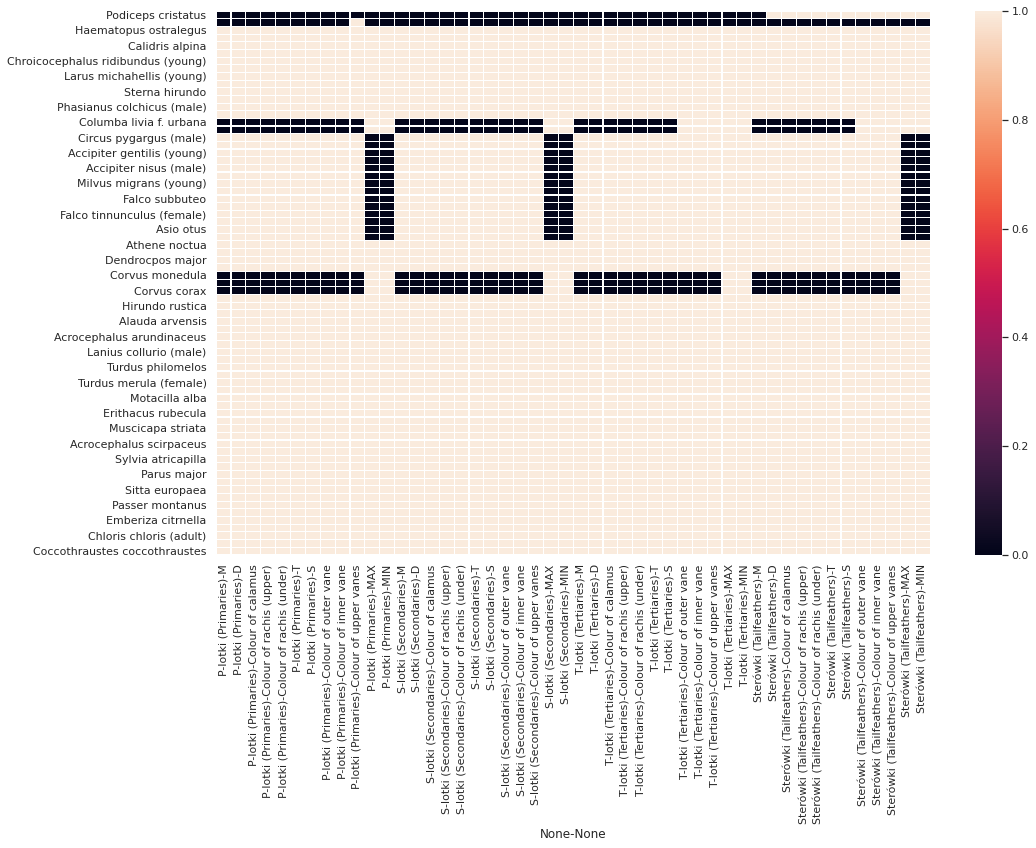

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(df[nan].isna(), linewidths=0.1)

In [59]:
values = {x:df.loc[:,x].unique() for x in df.columns}

In [86]:
flat = {x:set() for x in set([k[1] for k in values])}
for k in values:
    flat[k[1]] = flat[k[1]].union(values[k])

In [89]:
pd.DataFrame({k:[flat[k]] for k in flat})

,Colour of inner vane,MAX,MIN,S,Colour of rachis (upper),Colour of outer vane,Colour of calamus,M,D,Colour of rachis (under),Colour of upper vanes,T
0,"{nan, czarnobrązowy z zielonym i fioletowym po...","{nan, 90, 350, 190, 240, 360, 560, 260, 330, 1...","{nan, 150, 200, 100, 90, 280, 110, 380, 370, 6...","{nan, 2, 3, 1}","{biały i czarny, nan, brązowy, biała do brązow...","{nan, ciemnoszare z białą krawędzią, czarnobrą...","{nan, brązowy, żółtobrązowy, szary, żółtoszary...","{nan, Ten typ piór nie występuje u tego gatunk...","{nan, 2, 3, 1}","{nan, białoczarnobrązowy, biała i czarnobrązow...","{nan, szarobiały, szarobrązowy, czarny, białe ...","{nan, 5, 2, 4, 3}"
